In [1]:
import numpy as np
import galsim
from donutlib.makedonut import makedonut
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def donut_calc(zarray, r0):
    donut_zarray = [0,0,0]+zarray
    donutDict = {'writeToFits':False,
                 'iTelescope':2,
                 'nZernikeTerms':37,
                 'nbin':1024,
                 'nPixels':128,
                 'pixelOverSample':8,
                 'scaleFactor':2.0,
                 'rzero':r0,
                 'nEle':1.0e0, 
                 'background':0., 
                 'randomFlag':False,
                 'randomSeed':1234567890, 
                 'ZernikeArray':donut_zarray}
    return np.ascontiguousarray(makedonut(**donutDict).make())

In [3]:
aper = galsim.Aperture(lam=700, diam=8.36, obscuration=0.61, pad_factor=4.0, oversampling=0.5)
print(aper.illuminated.shape)
def galsim_calc(zarray, r0):
    atm_psf = galsim.Kolmogorov(lam=700, r0=r0)
    galsim_zarray = [0,0,0,0]+zarray
    optics_psf = galsim.OpticalPSF(lam=700, diam=aper.diam, aper=aper, aberrations=galsim_zarray)
    psf = galsim.Convolve(optics_psf, atm_psf)
    # Note GS images are 180-degree rotated compared to donutlib
    return np.ascontiguousarray(psf.drawImage(nx=128, ny=128, scale=0.2).array[::-1,::-1])

(1024, 1024)


/Users/josh/src/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


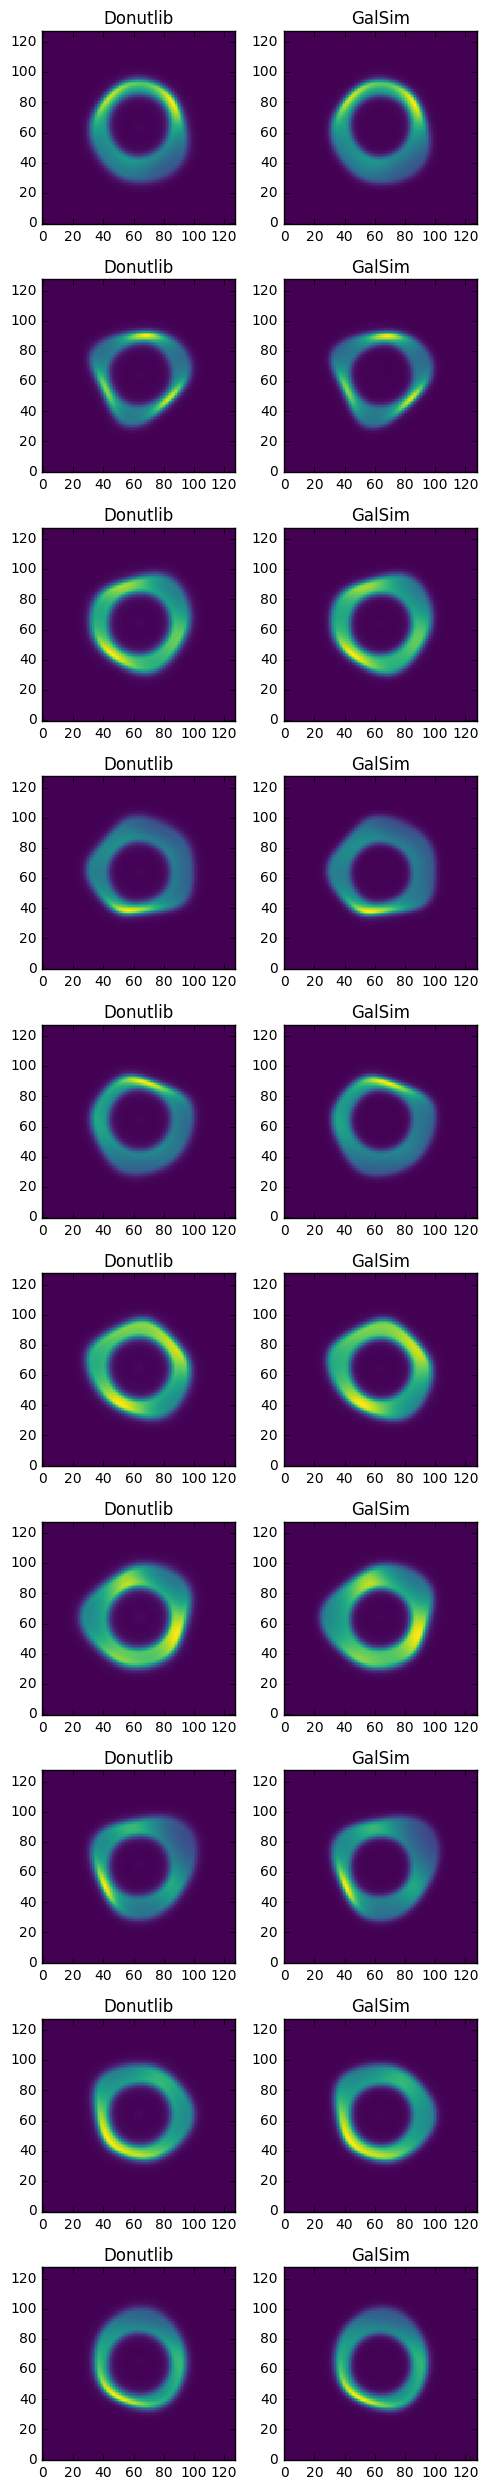

In [4]:
r0 = 0.2 # Pretty good seeing, corresponds to 0.7 arcsec at 700nm
gd = galsim.GaussianDeviate(12345)
z4 = 27.5
fig, axes = plt.subplots(10, 2, figsize=(5, 25))
for i in range(10):
    # Add Gaussian-distributed aberrations
    zarray = np.empty((17,), float)
    gd.generate(zarray)
    zarray = [z4]+list(0.2*zarray)
    donut_image = donut_calc(zarray, r0)
    galsim_image = galsim_calc(zarray, r0)
    axes[i, 0].imshow(donut_image)
    axes[i, 1].imshow(galsim_image)
    axes[i, 0].set_title("Donutlib")
    axes[i, 1].set_title("GalSim")
fig.tight_layout()
fig.show()
# fig.savefig("comparison.png")